# IRONKAGGLE
## TARGET 
### Price: Understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

The description for the 20 features is given below:

- id : Unique numeric number assigned to each house being sold.
- date : Date on which the house was sold out.
- price: Price of house which we have to predict so this is our target variable and aprat from it are our features.
- bedrooms : Number of bedrooms in a house.
- bathrooms : Number of bathrooms in a bedroom of a house.
- sqft_living : Measurement variable which determines the measurement of house in square foot.
- sqft_lot : Measurement variable which determines square foot of the lot.
- floors: Total floors means levels of house.
- waterfront : Whether a house has a view to waterfront 0 means no 1 means yes.
- view : Whether a house has been viewed or not 0 means no 1 means yes.
- condition : Overall condition of a house on a scale of 1 to 5.
- grade : Overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
- sqft_above : Square footage of house apart from basement.
- sqft_basement : Square footage of the basement of the house.
- yr_built : Date of building of the house.
- yr_renovated : Year of renovation of house.
- zipcode : Zipcode of the location of the house.
- lat : Latitude of the location of the house.
- long : Longitude of the location of the house.
- sqft_living15 : Living room area in 2015(implies-- some renovations)
- sqft_lot15 : lotSize area in 2015(implies-- some renovations)

In [4]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 01 | Data Extraction 

In [6]:
houses = pd.read_csv("king_country_houses.csv")

In [7]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# Hay una con 33 habitaciones, quizá hay que quitar esa fila???? (esto lo ha dicho hoy Xisca)

In [10]:
### EXPLICACIÓN DE TIPOS VALORES : NUMÉRICOS ENTEROS Y DECIMALES

In [11]:
houses.shape

(21613, 21)

We do have 21.613 rows and 21 columns, that we are going to explore. For this purpose, we do a copy of the original dataset.

### Columns standardization

In [14]:
houses.columns = [houses.lower().replace(" ", "_") for houses in houses.columns]

### Copy as best practices

In [16]:
df = houses.copy()

In [17]:
df['date'] = pd.to_datetime(df['date'].str[:8], format='%Y%m%d')

In [18]:
df['date'] = df['date'].apply(lambda x: x.toordinal())

In [19]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,735654,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,735374,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,735652,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,735407,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,735614,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 02 | Data Cleaning 

### Checking Null Values, Duplicates, Empty Spaces

In [22]:
df.dtypes

id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [23]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As we can see, there are no null value, duplicates or empty spaces.

# 03 | EDA

### Checking unique values

In [29]:
df.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           30
bedrooms            13
grade               12
floors               6
view                 5
condition            5
waterfront           2
dtype: int64

In [30]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,735535.193078,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,113.048011,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,735355.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,735436.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,735522.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,735646.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,735745.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Checking Distributions

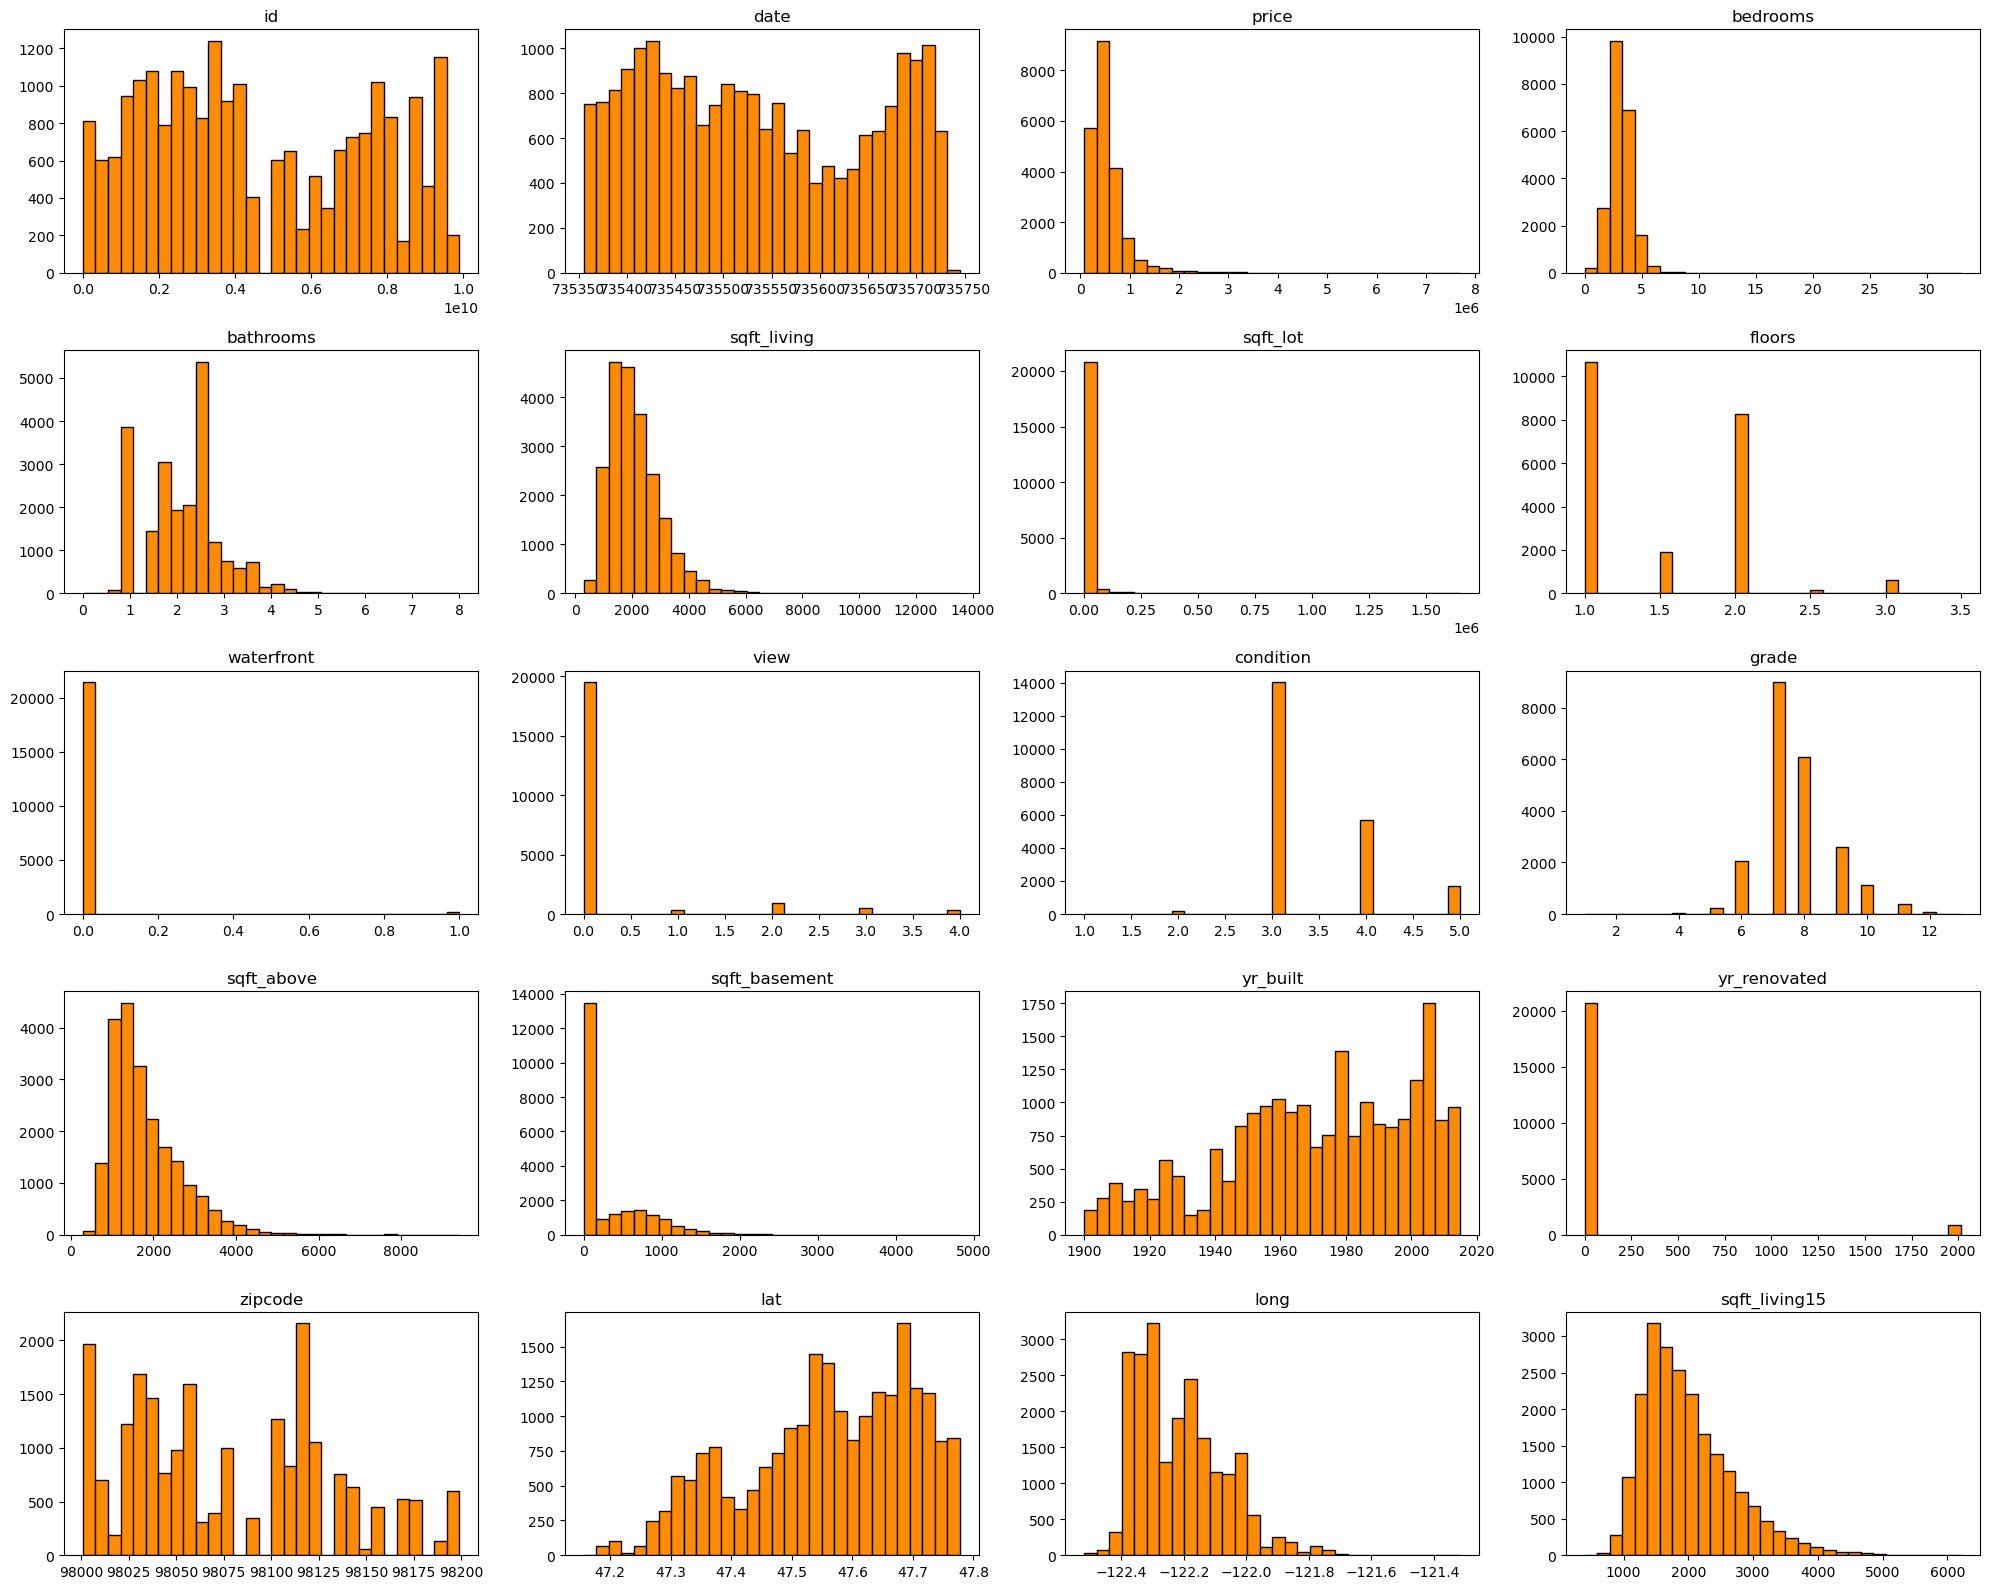

In [32]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

# Checking Outliers

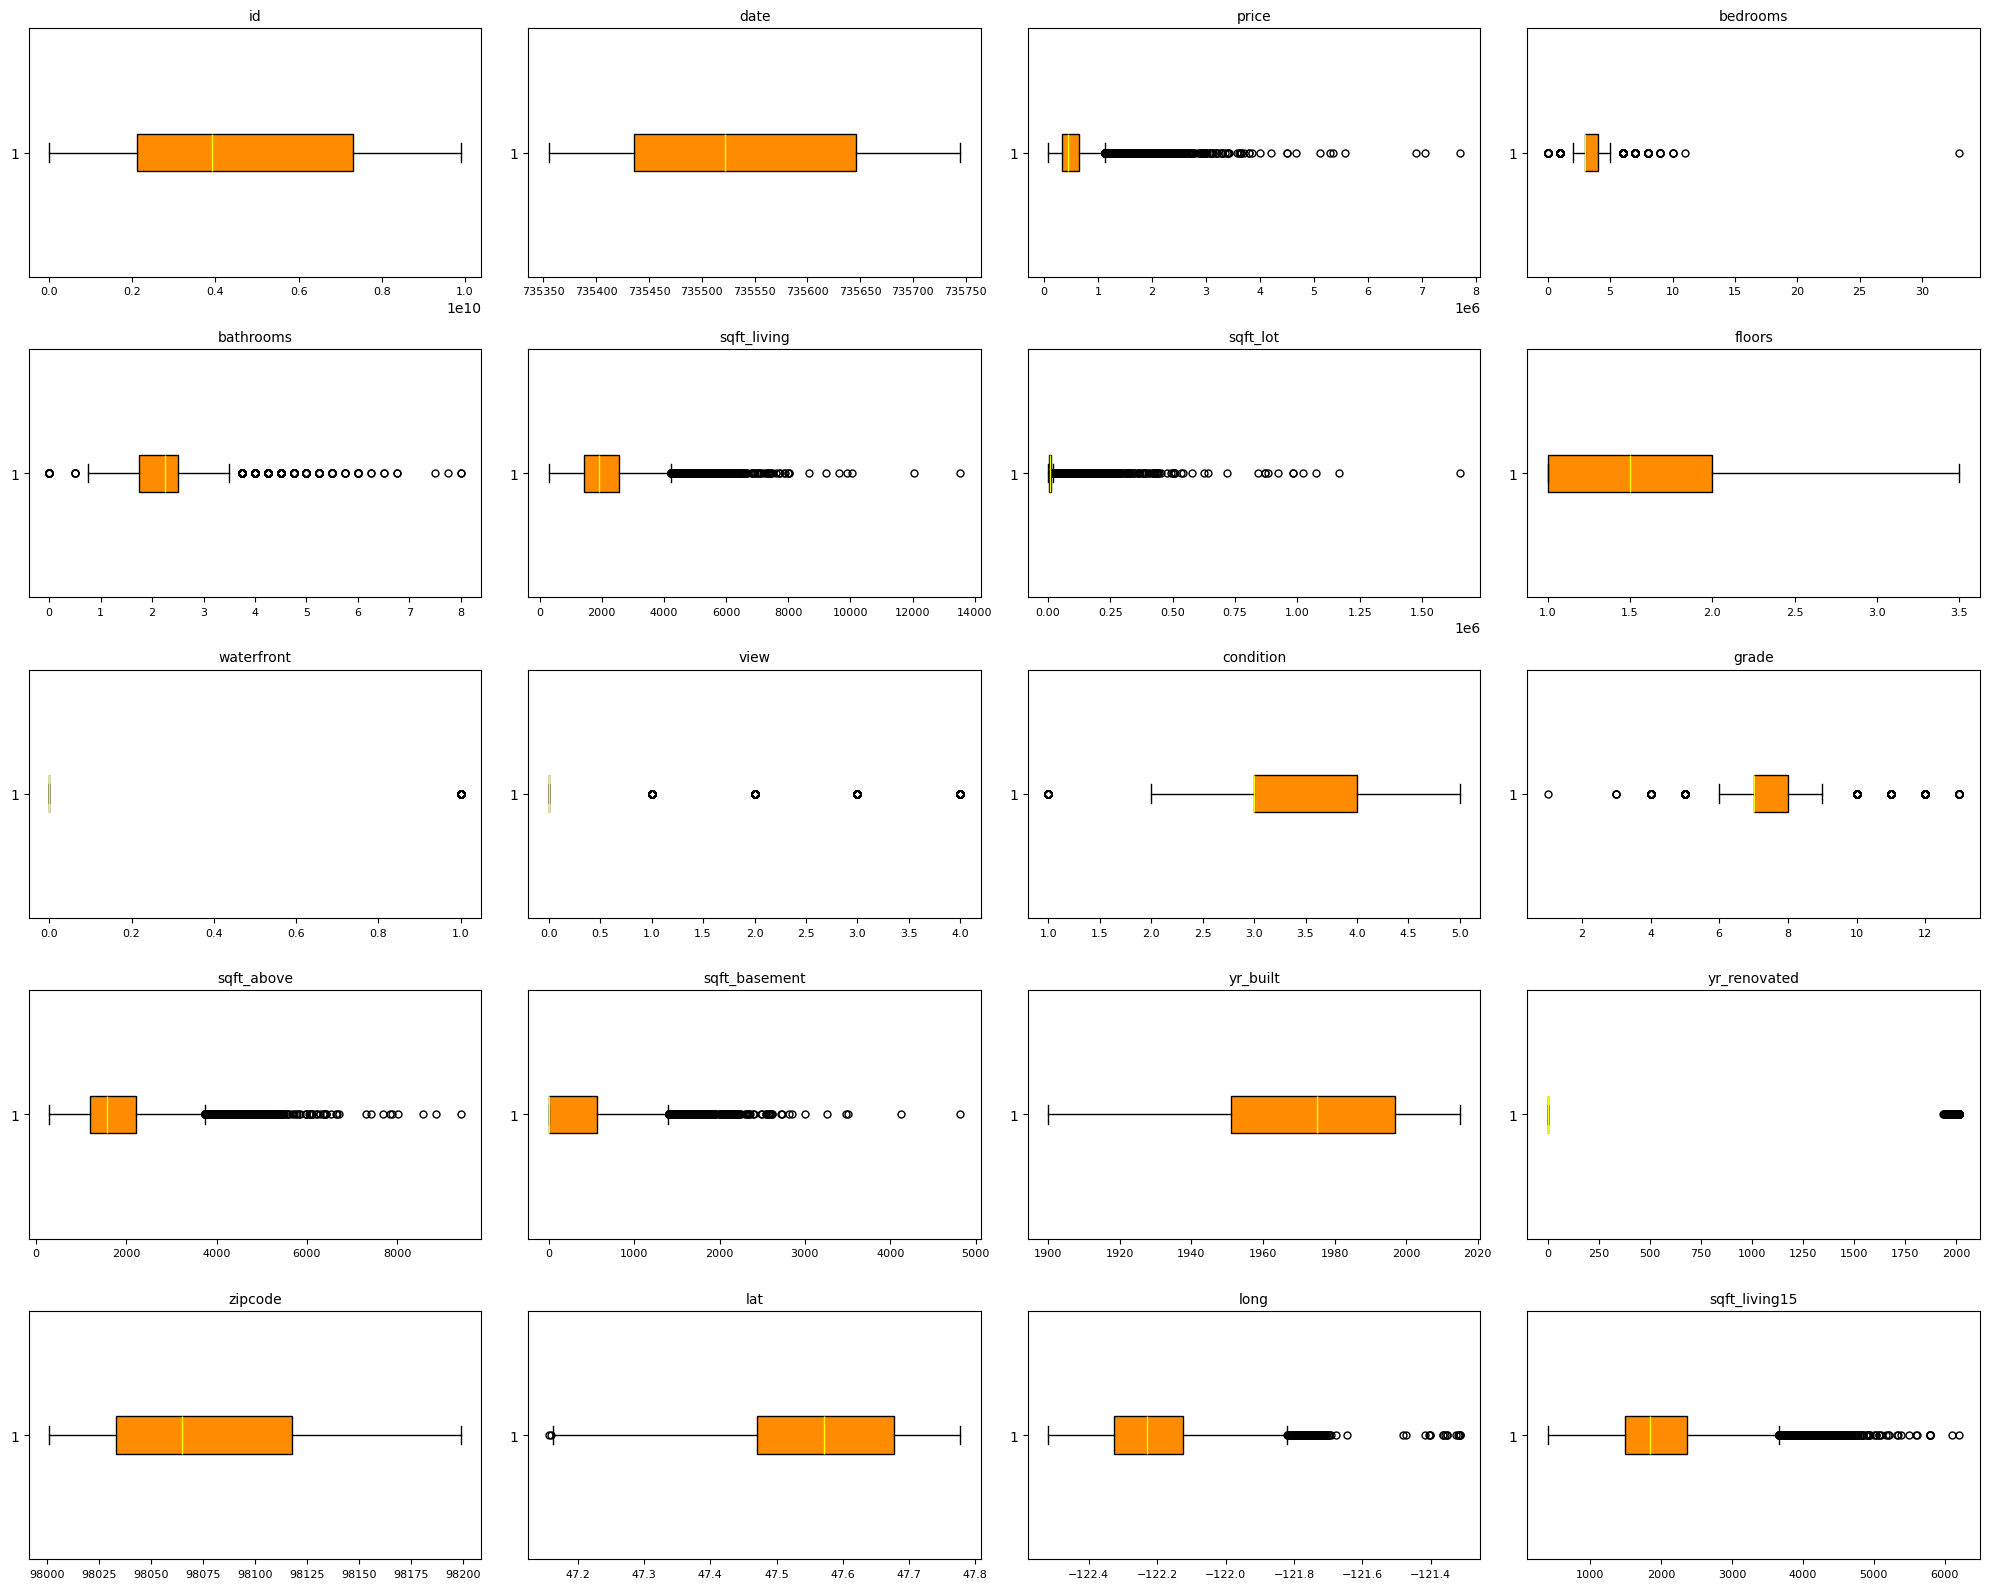

In [34]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

### Correlations

In [370]:
df.corrwith(df["price"]).sort_values(ascending=False).reset_index()

,index,0
0,price,1.00
1,sqft_living,0.70
2,grade,0.67
3,sqft_living15,0.59
4,bathrooms,0.53
5,view,0.40
6,sqft_basement,0.32
7,bedrooms,0.31
8,lat,0.31
9,waterfront,0.27


In [37]:
num_corr = round(df.corr(), 2)

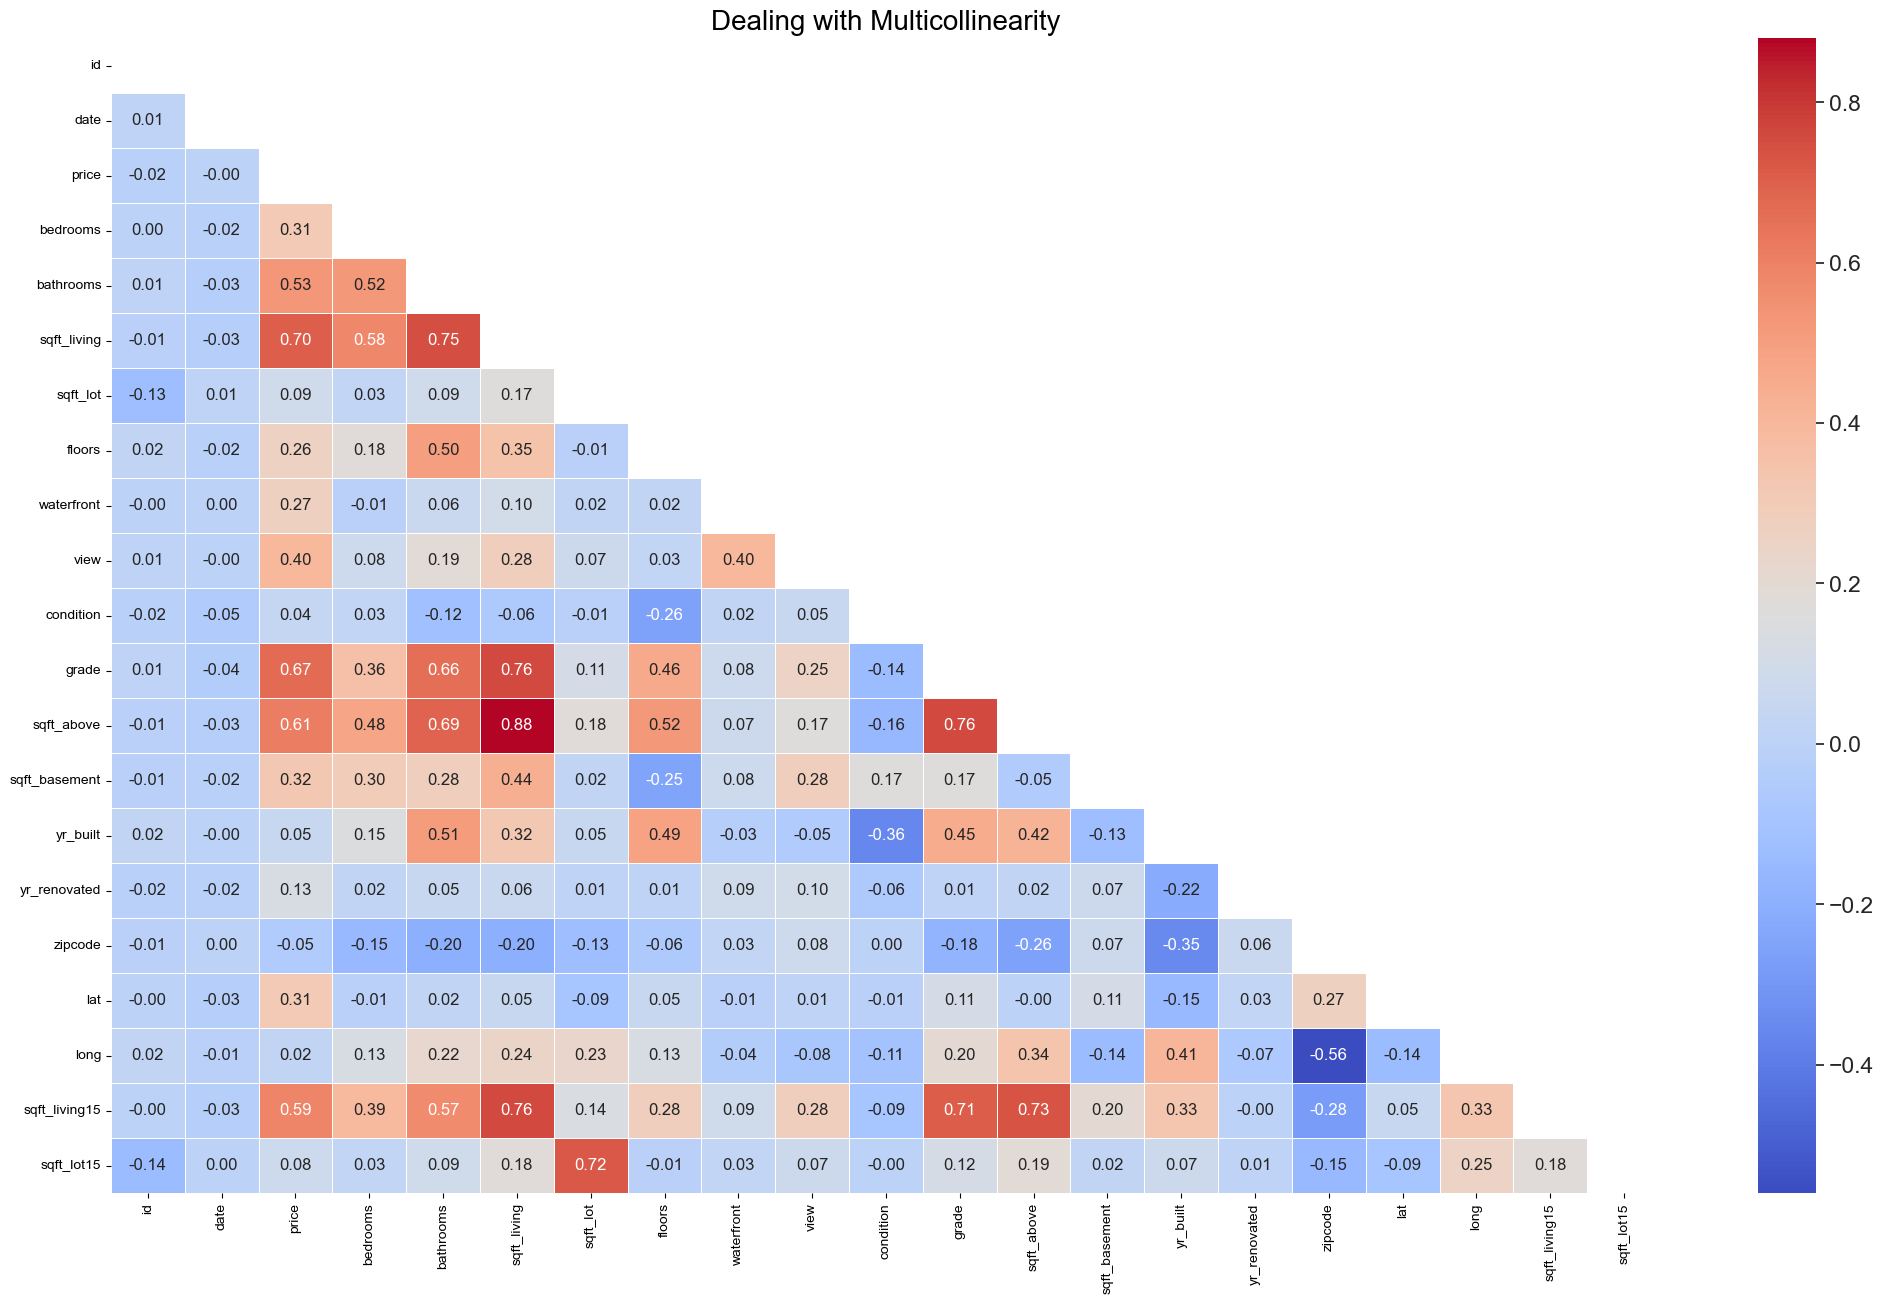

In [38]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) 

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) 
plt.show()

Como se puede ver en el heatmap, la target Price no está relacionada de ninguna manera con el 'id' ni con el 'date', por lo que eliminamos estas columnas.

In [40]:
df.drop(columns=['id','sqft_above'], inplace=True)

In [41]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,735519,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,735576,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,735654,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,735576,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,735647,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,735374,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,735652,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,735407,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,735614,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


Además, las variables que más influyen en el precio de la vivienda, basandonos en el heatmap son, en orden descendente:
- sqft_living: Metros cuadrados de la casa.
- grade: Valoración de la casa de 1-11.
- sqft_above: Valor catastral (jardín y otros).
- sqft_living_15: Metros cuadrados del salón.
- bathrooms: Número de baños.
- view: Vistas de la casa.
- bedrooms: Número de habitaciones.

# 04 | Data Preprocessing 

In [43]:
X = df.drop("price", axis=1)
y = df["price"]

# 05 | Modeling

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Selecting the Model

## Linear Regression

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
predictions = model.predict(X_test)

In [50]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.7005
RMSE =  207924.9949
The value of the metric MSE is  43232803513.0717
MAE =  127181.9958


## Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

In [54]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [55]:
predictions_ridge = ridge.predict(X_test)

In [56]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.7004
RMSE =  207957.9979
The value of the metric MSE is  43246528909.3765
MAE =  127177.6053


## Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [61]:
predictions_lasso = lasso.predict(X_test)

In [62]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [63]:
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.7005
RMSE =  207926.1667
The value of the metric MSE is  43233290805.5838
MAE =  127181.6039


## Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
predictions_tree = tree.predict(X_test)

In [68]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.7292
RMSE =  197712.9804
The value of the metric MSE is  39090422615.2725
MAE =  101952.9345


## KNN Regression

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [73]:
predictions_knn = knn.predict(X_test)

In [74]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.4814
RMSE =  273611.0778
The value of the metric MSE is  74863021883.8008
MAE =  165269.8363


## XGBoost Regression

In [77]:
import xgboost as xgb

In [78]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [79]:
predictions_xgb = xgbr.predict(X_test)

In [80]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

R2 =  0.7616
RMSE =  185515.524
The value of the metric MSE is  34416009641.335
MAE =  99849.0551


## Final Comparision

In [83]:
pd.set_option('display.float_format', '{:.2f}'.format)
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb]
}

df_metrics = pd.DataFrame(metrics)
df_metrics

,Model,R²,RMSE,MSE,MAE
0,Linear Regression,0.70,207924.99,43232803513.07,127182.00
1,Ridge,0.70,207958.00,43246528909.38,127177.61
2,Lasso,0.70,207926.17,43233290805.58,127181.60
3,Decision Tree,0.73,197712.98,39090422615.27,101952.93
4,KNN,0.48,273611.08,74863021883.80,165269.84
5,XGBoost,0.76,185515.52,34416009641.34,99849.06


Después de analizar el R2 con los diferentes modelos de predicción, vemos que aunque obtenemos un valor aceptable del mismo, es posible mejorarlo. En este sentido, analizaremos la colinearidad de las variables con la target y la multicolinearidad para poder conseguir un R2 más alto. 

Después de analizar la colinearidad de las variables con la target y la multicolinearidad del resto de variables entre sí, decidimos eliminar las columnas del id y de sqft_above. Con ello, obtenemos que el mejor modelo para hacer la regresión y obtener una predicción fiable, es el XGBoost. A continuación, pasaremos a refinar el modelo mediante estandarización del mismo.

## Normalization with MinMaxScaler

In [341]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)
r2_xg_norm = r2_score(y_test, predictions_xgb_2)
RMSE_xf_norm = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_norm = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_norm = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_norm, 4))
print("RMSE = ", round(RMSE_xf_norm, 4))
print("The value of the metric MSE is ", round(MSE_xg_norm, 4))
print("MAE = ", round(MAE_xg_norm, 4))

R2 =  0.8742
RMSE =  134739.0159
The value of the metric MSE is  18154602400.5297
MAE =  69674.4539


/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Normalization with Log Transform

In [344]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)
r2_xg_log = r2_score(y_test, predictions_xgb_2)
RMSE_xg_log = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_log = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_log = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_log, 4))
print("RMSE = ", round(RMSE_xg_log, 4))
print("The value of the metric MSE is ", round(MSE_xg_log, 4))
print("MAE = ", round(MAE_xg_log, 4))

/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


R2 =  0.8195
RMSE =  161415.2958
The value of the metric MSE is  26054897721.6614
MAE =  75016.2178


/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Normalization with StandardScaler

In [347]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.8742
RMSE =  134739.0159
The value of the metric MSE is  18154602400.5297
MAE =  69674.4539


/Users/sarasalmon/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [349]:
pd.set_option('display.float_format', '{:.2f}'.format)
metrics1 = {
    'Model': ['MinMaxScaler', 'StandardScaler', 'Log Transform'],
    'R²': [r2_xg_norm, r2_xg_stand, r2_xg_log],
    'RMSE': [RMSE_xf_norm, RMSE_xg_stand, RMSE_xg_log],
    'MSE': [MSE_xg_norm, MSE_xg_stand, MSE_xg_log],
    'MAE': [MAE_xg_norm, MAE_xg_stand, MAE_xg_log]
}
df_metrics1 = pd.DataFrame(metrics1)

In [351]:
df_metrics1

,Model,R²,RMSE,MSE,MAE
0,MinMaxScaler,0.87,134739.02,18154602400.53,69674.45
1,StandardScaler,0.87,134739.02,18154602400.53,69674.45
2,Log Transform,0.82,161415.30,26054897721.66,75016.22


Como el rendimiento es idéntico con tanto con MinMaxScaler y con el StandardScaler, elegimos el StandardScaler por ser más robusto frente a valores atípicos.

Elegimos trabajar con el modelo de predicción XGBoost, normalizado mediante StandardScaler

A continuación, comparamos la predicción del modelo con el valor real, para ver en qué medida se aproxima a los valores reales y por tanto, cuán de preciso es dicho modelo.

In [357]:
series_pred = pd.Series(predictions_xgb_2, name='predictions')
series_y_test = pd.Series(y_test, name='real')

In [359]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df.head(20)

,real,predictions
0,365000.00,387979.50
1,865000.00,948357.69
2,1038000.00,1117816.88
3,1490000.00,2621270.25
4,711000.00,726656.69
5,211000.00,242515.75
6,790000.00,830301.31
7,680000.00,632320.62
8,384500.00,425326.06
9,605000.00,590538.38


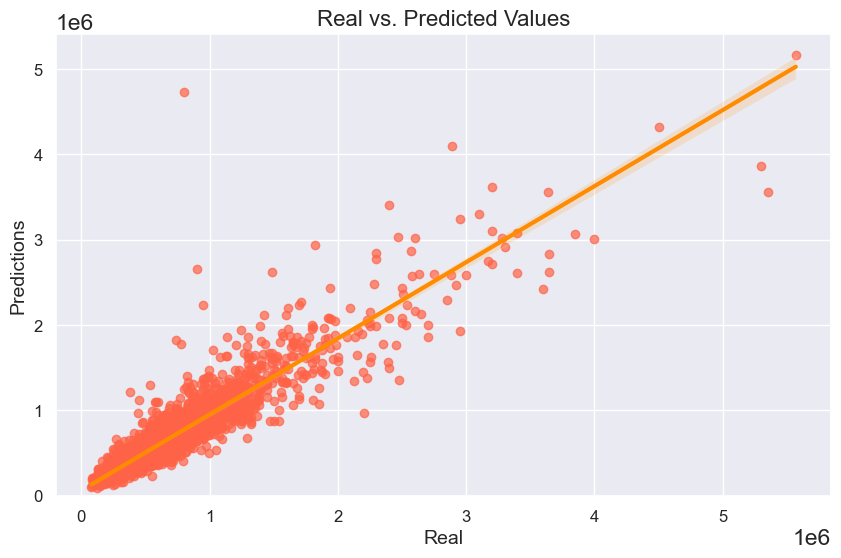

In [366]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='real', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Real vs. Predicted Values', fontsize=16)
plt.xlabel('Real', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## ADDITIONAL

In [162]:
df_2 = houses.copy()
df_2 = df_2[df_2['price'] >= 650000]
df_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
10,1736800520,20150403T000000,662500.00,3,2.50,3560,9796,1.00,0,0,...,8,1860,1700,1965,0,98007,47.60,-122.14,2210,8925
15,9297300055,20150124T000000,650000.00,4,3.00,2950,5000,2.00,0,3,...,9,1980,970,1979,0,98126,47.57,-122.38,2140,4000
21,2524049179,20140826T000000,2000000.00,3,2.75,3050,44867,1.00,0,4,...,9,2330,720,1968,0,98040,47.53,-122.23,4110,20336
26,1794500383,20140626T000000,937000.00,3,1.75,2450,2691,2.00,0,0,...,8,1750,700,1915,0,98119,47.64,-122.36,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,20140813T000000,679950.00,5,2.75,3600,9437,2.00,0,0,...,9,3600,0,2014,0,98059,47.48,-122.13,3550,9421
21597,191100405,20150421T000000,1575000.00,4,3.25,3410,10125,2.00,0,0,...,10,3410,0,2007,0,98040,47.57,-122.22,2290,10125
21599,7202300110,20140915T000000,810000.00,4,3.00,3990,7838,2.00,0,0,...,9,3990,0,2003,0,98053,47.69,-122.05,3370,6814
21600,249000205,20141015T000000,1537000.00,5,3.75,4470,8088,2.00,0,0,...,11,4470,0,2008,0,98004,47.63,-122.20,2780,8964


In [184]:
df_2['date'] = pd.to_datetime(df_2['date'].str[:8], format='%Y%m%d', errors='coerce')
df_2['date'] = df_2['date'].dt.toordinal()

AttributeError: Can only use .str accessor with string values!

In [186]:
df_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
10,1736800520,2015-04-03,662500.00,3,2.50,3560,9796,1.00,0,0,...,8,1860,1700,1965,0,98007,47.60,-122.14,2210,8925
15,9297300055,2015-01-24,650000.00,4,3.00,2950,5000,2.00,0,3,...,9,1980,970,1979,0,98126,47.57,-122.38,2140,4000
21,2524049179,2014-08-26,2000000.00,3,2.75,3050,44867,1.00,0,4,...,9,2330,720,1968,0,98040,47.53,-122.23,4110,20336
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0,0,...,8,1750,700,1915,0,98119,47.64,-122.36,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,2014-08-13,679950.00,5,2.75,3600,9437,2.00,0,0,...,9,3600,0,2014,0,98059,47.48,-122.13,3550,9421
21597,191100405,2015-04-21,1575000.00,4,3.25,3410,10125,2.00,0,0,...,10,3410,0,2007,0,98040,47.57,-122.22,2290,10125
21599,7202300110,2014-09-15,810000.00,4,3.00,3990,7838,2.00,0,0,...,9,3990,0,2003,0,98053,47.69,-122.05,3370,6814
21600,249000205,2014-10-15,1537000.00,5,3.75,4470,8088,2.00,0,0,...,11,4470,0,2008,0,98004,47.63,-122.20,2780,8964


In [ ]:
# En primer lugar, agrupamos por habitaciones, viendo la frecuencia de las habitaciones 

In [206]:
# Sacamos los value_counts()
habitaciones = df_2['bedrooms'].value_counts().sort_index()
habitaciones

bedrooms
0        2
1        6
2      236
3     1597
4     2558
5      752
6      138
7       20
8        8
9        4
10       3
Name: count, dtype: int64

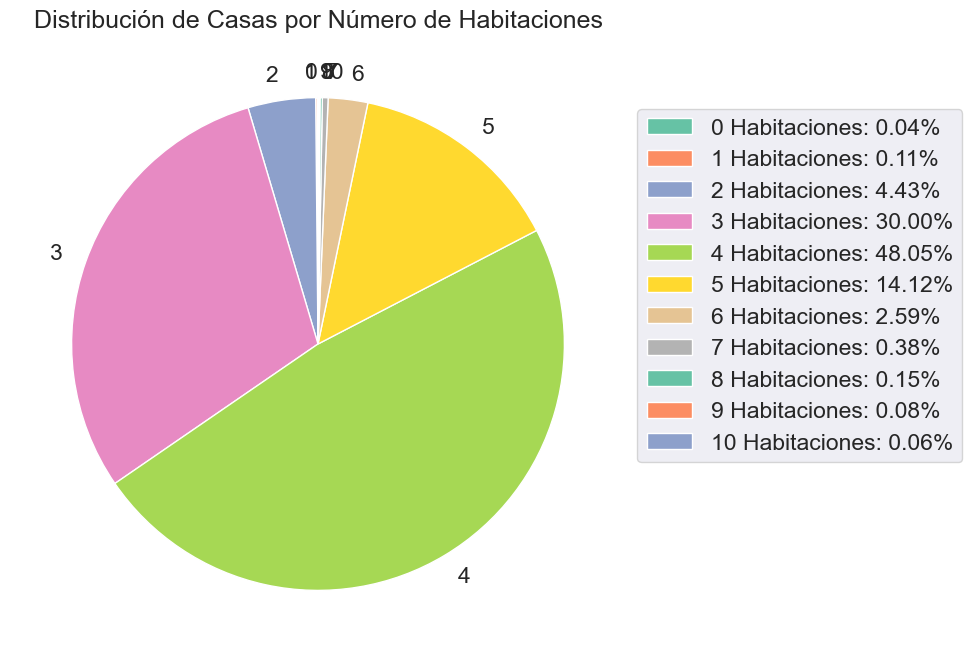

In [320]:
porcentajes = habitaciones / habitaciones.sum() * 100

# Graficar
plt.figure(figsize=(8, 8))
habitaciones.plot.pie(
    startangle=90,                             # Ángulo inicial de 90 grados
    colors=sns.color_palette('Set2'),          # Paleta de colores
    ylabel='',                                 # Remueve el título automático del eje y
)

# Crear una leyenda personalizada que muestra el número de habitaciones y porcentaje
plt.legend(
    labels=[f'{int(hab)} Habitaciones: {porc:.2f}%' for hab, porc in zip(habitaciones.index, porcentajes)],
    loc='upper left',                          # Ubicación de la leyenda
    bbox_to_anchor=(1, 0.9)                    # Posición de la leyenda fuera del gráfico
)

plt.title('Distribución de Casas por Número de Habitaciones')
plt.show()

/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_61031/2773313899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habitaciones.index, y=habitaciones.values, palette='Set2')


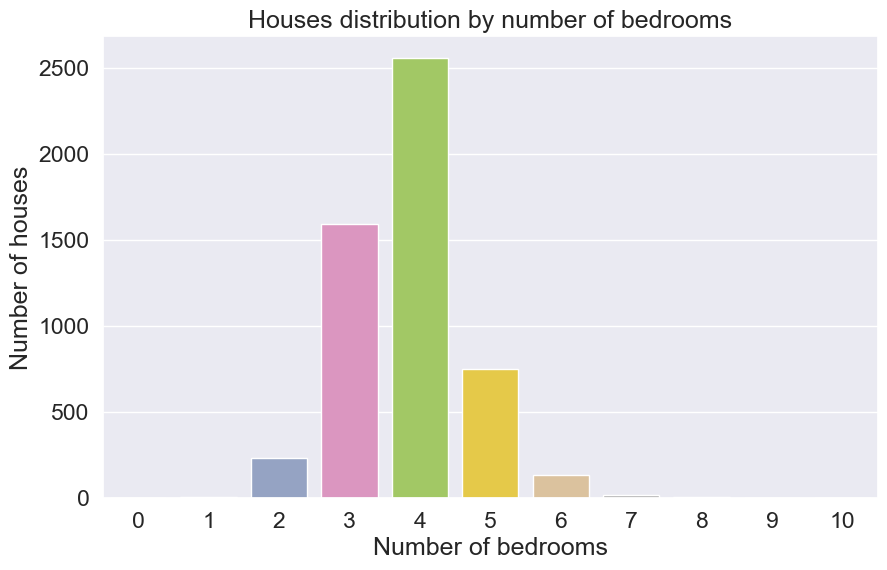

In [330]:
porcentajes = habitaciones / habitaciones.sum() * 100

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=habitaciones.index, y=habitaciones.values, palette='Set2')

# Etiquetas y título
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of houses')
plt.title('Houses distribution by number of bedrooms')
plt.show()

In [228]:
df_2['yr_built'] = (df_2['yr_built'] // 10) * 10
df_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2000,0,98053,47.66,-122.00,4760,101930
10,1736800520,2015-04-03,662500.00,3,2.50,3560,9796,1.00,0,0,...,8,1860,1700,1960,0,98007,47.60,-122.14,2210,8925
15,9297300055,2015-01-24,650000.00,4,3.00,2950,5000,2.00,0,3,...,9,1980,970,1970,0,98126,47.57,-122.38,2140,4000
21,2524049179,2014-08-26,2000000.00,3,2.75,3050,44867,1.00,0,4,...,9,2330,720,1960,0,98040,47.53,-122.23,4110,20336
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0,0,...,8,1750,700,1910,0,98119,47.64,-122.36,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,2014-08-13,679950.00,5,2.75,3600,9437,2.00,0,0,...,9,3600,0,2010,0,98059,47.48,-122.13,3550,9421
21597,191100405,2015-04-21,1575000.00,4,3.25,3410,10125,2.00,0,0,...,10,3410,0,2000,0,98040,47.57,-122.22,2290,10125
21599,7202300110,2014-09-15,810000.00,4,3.00,3990,7838,2.00,0,0,...,9,3990,0,2000,0,98053,47.69,-122.05,3370,6814
21600,249000205,2014-10-15,1537000.00,5,3.75,4470,8088,2.00,0,0,...,11,4470,0,2000,0,98004,47.63,-122.20,2780,8964


In [230]:
# barplot

# Sacamos los value_counts()
años_construccion = df_2['yr_built'].value_counts().sort_index()
años_construccion

yr_built
1900     226
1910     253
1920     380
1930     163
1940     258
1950     482
1960     417
1970     432
1980     524
1990     681
2000    1066
2010     442
Name: count, dtype: int64

In [232]:
df_2['yr_built'].nunique()

12

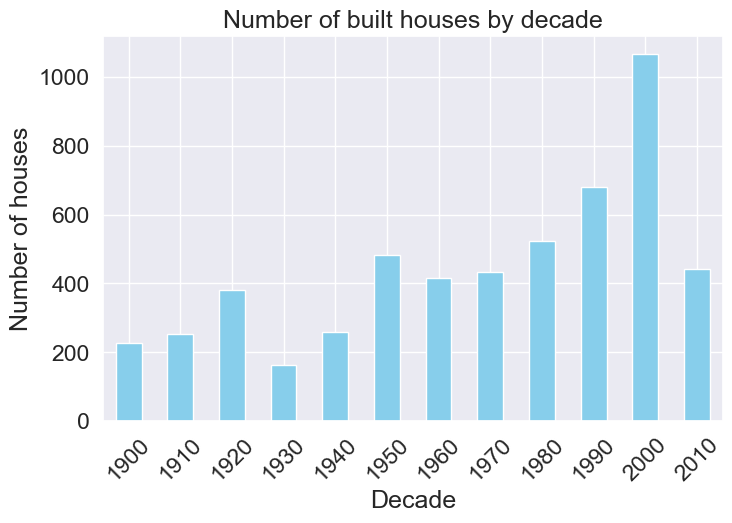

In [372]:
plt.figure(figsize=(8, 5))
años_construccion.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of houses')
plt.title('Number of built houses by decade')
plt.xticks(rotation=45)
plt.show()

# cambiar a inglés

In [ ]:
# nueva columna para precios por decada

# agrupar por decada y calcular (groupby)

In [252]:
precio_construccion = df_2.groupby('yr_built')['price'].mean().reset_index()
precio_construccion

,yr_built,price
0,1900,996890.97
1,1910,981627.55
2,1920,946546.93
3,1930,1107997.25
4,1940,948681.88
5,1950,963341.29
6,1960,977981.81
7,1970,932845.17
8,1980,962081.26
9,1990,999880.79


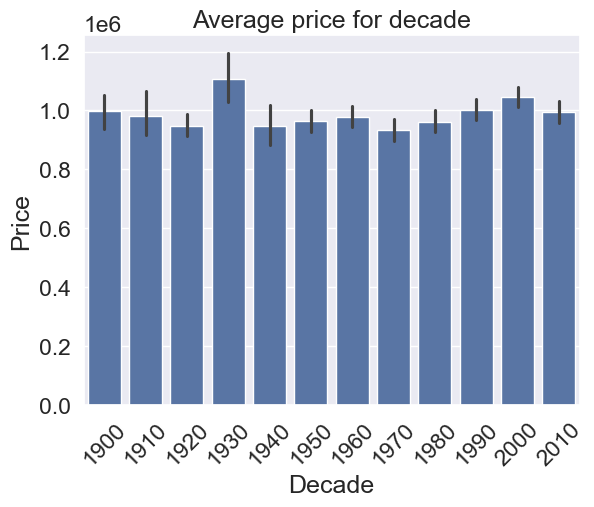

In [383]:
sns.barplot(x='yr_built', y='price', data=df_2)
plt.xlabel('Decade')
plt.ylabel('Price')
plt.title('Average price for decade')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
df_2.plot(x='yr_built', y='price', kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.title('Average price for decade')
plt.xticks(rotation=45)
plt.show()

In [264]:
# Nos parece raro que las casas más caras sean las que se hayan construido en 1930
# Pensamos que puede ser por outliers, por lo que procedemos a eliminarlos

Q1 = df_2['price'].quantile(0.25)
Q3 = df_2['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_2_sinoutliers = df_2[(df_2['price'] >= lower_bound) & (df_2['price'] <= upper_bound)]

In [266]:
df_2_sinoutliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2000,0,98053,47.66,-122.00,4760,101930
10,1736800520,2015-04-03,662500.00,3,2.50,3560,9796,1.00,0,0,...,8,1860,1700,1960,0,98007,47.60,-122.14,2210,8925
15,9297300055,2015-01-24,650000.00,4,3.00,2950,5000,2.00,0,3,...,9,1980,970,1970,0,98126,47.57,-122.38,2140,4000
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0,0,...,8,1750,700,1910,0,98119,47.64,-122.36,1760,3573
27,3303700376,2014-12-01,667000.00,3,1.00,1400,1581,1.50,0,0,...,8,1400,0,1900,0,98112,47.62,-122.31,1860,3861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21593,8672200110,2015-03-17,1088000.00,5,3.75,4170,8142,2.00,0,2,...,10,4170,0,2000,0,98056,47.54,-122.18,3030,7980
21596,7502800100,2014-08-13,679950.00,5,2.75,3600,9437,2.00,0,0,...,9,3600,0,2010,0,98059,47.48,-122.13,3550,9421
21599,7202300110,2014-09-15,810000.00,4,3.00,3990,7838,2.00,0,0,...,9,3990,0,2000,0,98053,47.69,-122.05,3370,6814
21600,249000205,2014-10-15,1537000.00,5,3.75,4470,8088,2.00,0,0,...,11,4470,0,2000,0,98004,47.63,-122.20,2780,8964


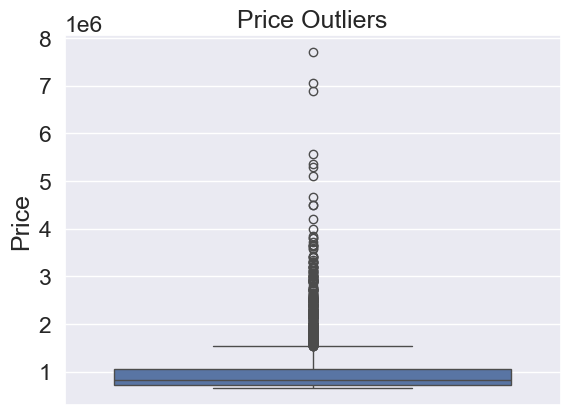

In [308]:
sns.boxplot(y='price', data=df_2)

plt.title('Price Outliers')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

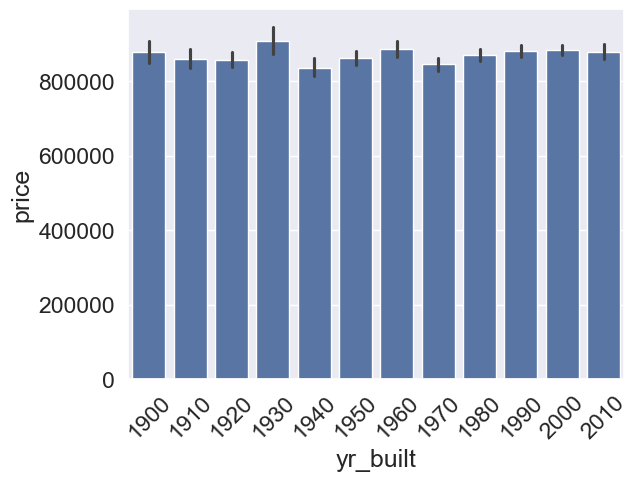

In [268]:
sns.barplot(x='yr_built', y='price', data=df_2_sinoutliers)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Seguimos viendo una distribución uniforme, de hecho, al quitar los outliers sale una distribución aun más uniforme

In [270]:
# Miramos a ver si es porque las casas están renovadas.
df_2_sinoutliers['yr_renovated'].value_counts()

yr_renovated
0       4478
2014      38
2007      19
2005      18
2000      16
2003      15
2013      14
2004      14
1999      12
2010      12
1991      12
2002      12
1990      11
2006      10
2001       9
1989       9
1996       8
1993       8
2015       8
1994       7
2009       7
2008       7
1984       7
2011       6
1992       6
1988       6
1998       5
1987       5
1995       5
1997       5
1985       4
2012       4
1983       3
1979       3
1982       3
1969       2
1975       2
1986       2
1980       2
1970       2
1956       2
1978       1
1954       1
1972       1
1962       1
1963       1
1968       1
1965       1
1974       1
1958       1
1960       1
Name: count, dtype: int64

In [ ]:
# Vemos que la mayoría de las casas no están renovadas, por lo que está variable tampoco explica la uniformidad

In [284]:
# Precio medio por barrio
precio_zip = df_2_sinoutliers.groupby('zipcode')['price'].mean().reset_index()
precio_zip

,zipcode,price
0,98001,850000.00
1,98003,833333.33
2,98004,1001475.13
3,98005,856347.44
4,98006,933719.02
...,...,...
58,98177,886144.27
59,98178,803945.00
60,98188,706500.00
61,98198,895300.00


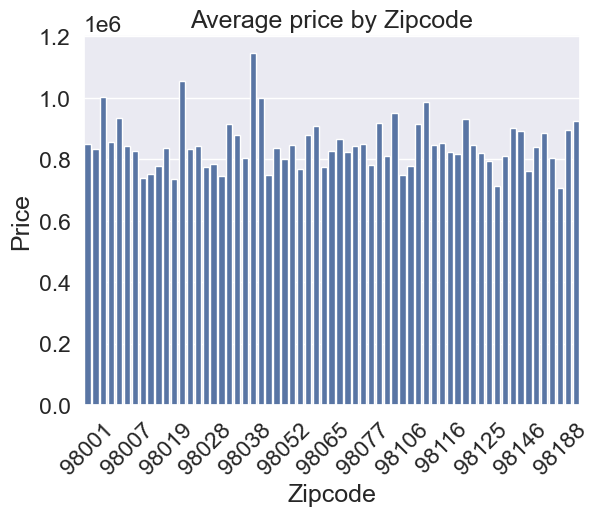

In [397]:
sns.barplot(x='zipcode', y='price', data=precio_zip)
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Average price by Zipcode')
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(precio_zip), 5), rotation=45)
plt.show()

In [290]:
precio_habitacion = df_2.groupby('bedrooms')['price'].mean().reset_index()
precio_habitacion

,bedrooms,price
0,0,1195325.00
1,1,766683.33
2,2,841009.72
3,3,897812.29
4,4,992324.97
5,5,1175682.78
6,6,1203210.36
7,7,1377743.00
8,8,1519750.00
9,9,1078500.00


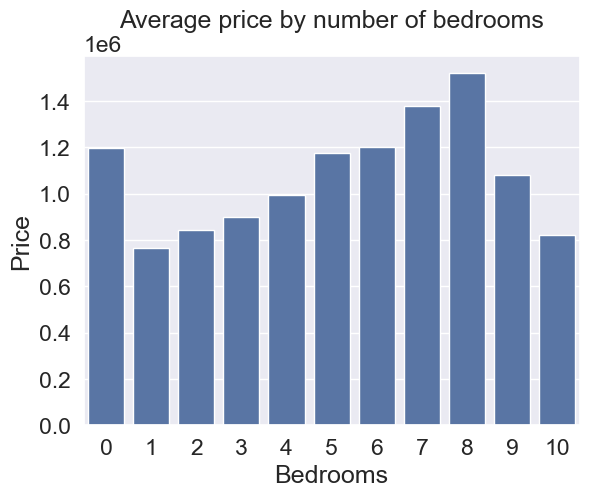

In [387]:
sns.barplot(x='bedrooms', y='price', data=precio_habitacion)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Average price by number of bedrooms')
plt.show()

In [298]:
df_2.bedrooms.value_counts()

bedrooms
4     2558
3     1597
5      752
2      236
6      138
7       20
8        8
1        6
9        4
10       3
0        2
Name: count, dtype: int64

In [ ]:
# CONCLUSIÓN: Es sorprendente no ver una tendencia alzista del precio, cuando nos sale que el año con el precio medio mñas alto es 1930

In [258]:
precio_waterfront = df_2.groupby('waterfront')['price'].mean().reset_index()
precio_waterfront

,waterfront,price
0,0,966778.25
1,1,1915707.46


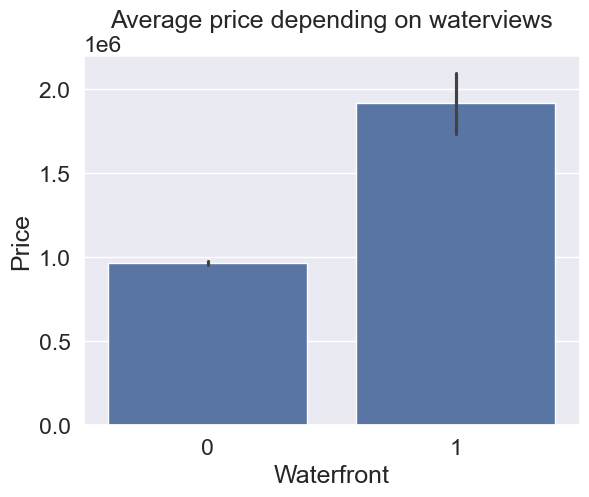

In [389]:
sns.barplot(x='waterfront', y='price', data=df_2)
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Average price depending on waterviews')
plt.show()

In [401]:
df_2[df_2['yr_built'] == 1930].sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6508,4217402115,2015-04-21,3650000.00,6,4.75,5480,19401,1.50,1,4,...,11,3910,1570,1930,0,98105,47.65,-122.28,3510,15810
10446,1118000320,2015-05-08,3400000.00,4,4.00,4260,11765,2.00,0,0,...,11,3280,980,1930,2010,98112,47.64,-122.29,4260,10408
7907,1068000375,2014-09-23,3200000.00,6,5.00,7100,18200,2.50,0,0,...,13,5240,1860,1930,2002,98199,47.64,-122.41,3130,6477
1433,9471200370,2015-03-30,2537000.00,4,3.00,3710,20000,2.00,0,2,...,10,2760,950,1930,0,98105,47.67,-122.26,3970,20000
7506,9471200265,2015-05-05,2500000.00,4,3.25,3960,16224,2.00,0,2,...,12,3100,860,1930,0,98105,47.67,-122.26,3960,15050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1630700135,2014-11-19,659000.00,4,2.00,1980,23625,2.00,0,0,...,8,1980,0,1930,1984,98072,47.76,-122.09,2300,24640
9983,3528900160,2014-10-01,655000.00,3,1.00,1370,5250,1.00,0,0,...,7,1070,300,1930,0,98109,47.64,-122.35,2410,4200
11292,5035300570,2014-09-23,650000.00,3,2.00,2300,5000,1.00,0,0,...,8,1150,1150,1930,0,98199,47.65,-122.41,2300,5000
18758,5101404482,2014-09-29,650000.00,3,2.50,2220,6380,1.50,0,0,...,8,1660,560,1930,0,98115,47.70,-122.31,950,6380


In [ ]:
# HIPOTSIS:
# A) Las casas cambiaban de precio segun año de construcción: Resultado no
# S) Las casas aumentan de precio a medida que las habitaciones aumentan: Resultado NO
# B) Las casas aumentan de precio según barrio : Resultado no
# C) Las cambian de precio según año de reforma : Resultado no 
# D) Las casas aumentan de precio por vistas al mar: Resultado SI